# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'Inserm</span>

Après réception du fichier csv contenant la liste de DOI enrichie (ajout du titre, des auteurs, de l'année, du statut open access...) de la part du MESRI, les graphiques peuvent être générés directement depuis le Baromètre national (voir le mode d'emploi sur la partie "déclinaisons locales" du site web du BSO national).  
Néanmoins, à partir de ce fichier, certains graphiques réalisés pour le Baromètre Inserm peuvent toujours être générés et mis à jour en suivant ce code.  
Il suffit de remplacer "inserm" par le nom de son établissement à l'intérieur du code.

Les résultats obtenus ici sont le reflet de la situation d'ouverture des publications en décembre 2022, date à laquelle les dernières extractions ont été réalisées.  
Le Baromètre national et, par extension, ses déclinaisons locales depuis le portail national, étant mis à jour régulièrement, les taux affichés sur les graphiques ci-dessous sont obsolètes.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

On commence par lire le fichier enrichi envoyé par le MESRI. Seuls les DOI présents dans Crossref sont traités, il se peut donc que le nombre de publications présentes dans ce tableau soit inférieur au nombre de DOI rassemblés à la fin du notebook "nettoyage_donnees".

In [ ]:
df_complete = pd.read_csv("bso-publications-latest_180036048_enriched.csv", sep=";")

In [3]:
df_complete.shape

(171993, 46)

## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

### Proportion des publications annee N en accès ouvert (mesuré en décembre N+1)

Il faut commencer par déterminer les données qui vont être utilisées pour réaliser le graphique : compter le nombre de publications parues en 2022 et les isoler dans la variable "pie_data".  
**Bien que ce calcul soit réalisé en décembre 2023, il est plus pertinent d'utiliser les données 2022 que les données 2023 pour ce graphique. En effet, les délais d'embargos pouvant monter jusqu'à 12 mois ne permettent pas de juger en décembre 2023 la réelle ouverture des publications de l'année précédente.**

**<span style="color:red">Dans la variable "annee" mettre la dernière année à traiter, par exemple pour le fichier enrichie recu fin 2023, on se limite aux publications de 2022</span>**

In [5]:
annee = 2023

Isoler l'année à traiter :

In [6]:
df_year = df_complete.loc[df_complete['year'] == annee, :]
df_year.shape

(17435, 46)

In [14]:
# pour info, yearly distibution
df_complete['year'].value_counts()

year
2021    20402
2022    19295
2020    18973
2023    17435
2019    16582
2018    15121
2017    14758
2016    13826
2015    12526
2014    11398
2013    10522
2024     1155
Name: count, dtype: int64

### Taux d'accès ouvert aux publications 2023 (normalisé)

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par discipline dans l'année ?**

#### Type d'accès :

In [7]:
df_year['oa_colors'].value_counts()

oa_colors
green|gold       6753
closed           2703
green|hybrid     2529
green            2053
other            1388
hybrid            867
green|other       794
gold              176
green|diamond     148
diamond            24
Name: count, dtype: int64

In [8]:
df_year['unpaywall_oa_status'].value_counts()

unpaywall_oa_status
gold      7099
hybrid    3024
closed    2701
bronze    2518
green     1741
Name: count, dtype: int64

Correspondances entre les 2 colonnes specifiant le type d'OA

In [8]:
df_year[['oa_colors','unpaywall_oa_status']].value_counts()

oa_colors      unpaywall_oa_status
green|gold     gold                   6752
closed         closed                 2701
green|hybrid   hybrid                 2382
green          green                  1734
other          bronze                 1355
green|other    bronze                  794
hybrid         hybrid                  640
               bronze                  227
gold           gold                    176
green|diamond  gold                    147
green|hybrid   bronze                  141
diamond        gold                     24
green|hybrid   green                     6
other          hybrid                    2
green|diamond  bronze                    1
green|gold     green                     1
Name: count, dtype: int64

#### Discipline :

In [9]:
publications_par_domaine = df_year['bso_classification'].value_counts().sort_index()
publications_par_domaine

bso_classification
Biology (fond.)                               6680
Chemistry                                      504
Computer and  information sciences             315
Earth, Ecology, Energy and applied biology     255
Engineering                                    447
Humanities                                     377
Mathematics                                    173
Medical research                              8293
Physical sciences, Astronomy                   270
Social sciences                                121
Name: count, dtype: int64

***Nombre de publications par discipline et type d'accès:***

In [10]:
df_oa_discipline_global_type = pd.crosstab([df_year['bso_classification']], df_year['unpaywall_oa_status'])
df_oa_discipline_global_type

unpaywall_oa_status,bronze,closed,gold,green,hybrid
bso_classification,,,,,
Biology (fond.),858,771,3042,698,1169
Chemistry,64,38,165,110,112
Computer and information sciences,28,17,112,76,46
"Earth, Ecology, Energy and applied biology",29,10,134,23,51
Engineering,57,28,164,98,65
Humanities,57,43,157,50,57
Mathematics,16,22,60,31,22
Medical research,1359,1731,3129,578,1426
"Physical sciences, Astronomy",33,21,96,65,47


Ajout d'une colonne avec le nombre total de publications par discipline:

In [11]:
df_oa_discipline_global_type["Total"] = publications_par_domaine
df_oa_discipline_global_type

unpaywall_oa_status,bronze,closed,gold,green,hybrid,Total
bso_classification,,,,,,
Biology (fond.),858,771,3042,698,1169,6680
Chemistry,64,38,165,110,112,504
Computer and information sciences,28,17,112,76,46,315
"Earth, Ecology, Energy and applied biology",29,10,134,23,51,255
Engineering,57,28,164,98,65,447
Humanities,57,43,157,50,57,377
Mathematics,16,22,60,31,22,173
Medical research,1359,1731,3129,578,1426,8293
"Physical sciences, Astronomy",33,21,96,65,47,270


In [12]:
df_oa_discipline_global_type.index

Index(['Biology (fond.)', 'Chemistry', 'Computer and  information sciences',
       'Earth, Ecology, Energy and applied biology', 'Engineering',
       'Humanities', 'Mathematics', 'Medical research',
       'Physical sciences, Astronomy', 'Social sciences'],
      dtype='object', name='bso_classification')

Traduction des disciplines en français :

In [13]:
df_oa_discipline_global_type.rename(
    index = {
        "Biology (fond.)": "Biologie (fond.)",
        "Chemistry": "Chimie",
        "Computer and  information sciences": "Informatique",
        "Earth, Ecology, Energy and applied biology": "Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée",
        "Engineering": "Sciences de l'Ingénieur",
        "Humanities": "Humanités",
        "Mathematics": "Mathématiques",
        "Medical research": "Sciences médicales",
        "Physical sciences, Astronomy": "Sciences physiques, astronomie",
        "Social sciences": "Sciences sociales",
    },
    inplace = True,
)
df_oa_discipline_global_type

unpaywall_oa_status,bronze,closed,gold,green,hybrid,Total
bso_classification,,,,,,
Biologie (fond.),858,771,3042,698,1169,6680
Chimie,64,38,165,110,112,504
Informatique,28,17,112,76,46,315
"Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée",29,10,134,23,51,255
Sciences de l'Ingénieur,57,28,164,98,65,447
Humanités,57,43,157,50,57,377
Mathématiques,16,22,60,31,22,173
Sciences médicales,1359,1731,3129,578,1426,8293
"Sciences physiques, astronomie",33,21,96,65,47,270


***Nombre de publications par discipline et type d'accès en pourcentage:***

In [14]:
df_oa_discipline_global_type_perc = pd.crosstab([df_year['bso_classification']], df_year['unpaywall_oa_status'], normalize = 'index')
df_oa_discipline_global_type_perc

unpaywall_oa_status,bronze,closed,gold,green,hybrid
bso_classification,,,,,
Biology (fond.),0.131233,0.117926,0.465280,0.106760,0.178801
Chemistry,0.130879,0.077710,0.337423,0.224949,0.229039
Computer and information sciences,0.100358,0.060932,0.401434,0.272401,0.164875
"Earth, Ecology, Energy and applied biology",0.117409,0.040486,0.542510,0.093117,0.206478
Engineering,0.138350,0.067961,0.398058,0.237864,0.157767
Humanities,0.156593,0.118132,0.431319,0.137363,0.156593
Mathematics,0.105960,0.145695,0.397351,0.205298,0.145695
Medical research,0.165268,0.210507,0.380518,0.070291,0.173416
"Physical sciences, Astronomy",0.125954,0.080153,0.366412,0.248092,0.179389


Tri par pourcentage de publications en accès fermé croissant:

In [15]:
df_oa_discipline_global_type_perc = df_oa_discipline_global_type_perc.sort_values(by='closed', ascending=True)
df_oa_discipline_global_type_perc

unpaywall_oa_status,bronze,closed,gold,green,hybrid
bso_classification,,,,,
"Earth, Ecology, Energy and applied biology",0.117409,0.040486,0.542510,0.093117,0.206478
Computer and information sciences,0.100358,0.060932,0.401434,0.272401,0.164875
Engineering,0.138350,0.067961,0.398058,0.237864,0.157767
Chemistry,0.130879,0.077710,0.337423,0.224949,0.229039
"Physical sciences, Astronomy",0.125954,0.080153,0.366412,0.248092,0.179389
Biology (fond.),0.131233,0.117926,0.465280,0.106760,0.178801
Humanities,0.156593,0.118132,0.431319,0.137363,0.156593
Mathematics,0.105960,0.145695,0.397351,0.205298,0.145695
Social sciences,0.144068,0.169492,0.338983,0.101695,0.245763


Traduction des disciplines en français :

In [16]:
df_oa_discipline_global_type_perc.rename(
    index = {
        "Biology (fond.)": "Biologie (fond.)",
        "Chemistry": "Chimie",
        "Computer and  information sciences": "Informatique",
        "Earth, Ecology, Energy and applied biology": "Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée",
        "Engineering": "Sciences de l'Ingénieur",
        "Humanities": "Humanités",
        "Mathematics": "Mathématiques",
        "Medical research": "Sciences médicales",
        "Physical sciences, Astronomy": "Sciences physiques, astronomie",
        "Social sciences": "Sciences sociales",
    },
    inplace = True,
)
df_oa_discipline_global_type_perc

unpaywall_oa_status,bronze,closed,gold,green,hybrid
bso_classification,,,,,
"Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée",0.117409,0.040486,0.542510,0.093117,0.206478
Informatique,0.100358,0.060932,0.401434,0.272401,0.164875
Sciences de l'Ingénieur,0.138350,0.067961,0.398058,0.237864,0.157767
Chimie,0.130879,0.077710,0.337423,0.224949,0.229039
"Sciences physiques, astronomie",0.125954,0.080153,0.366412,0.248092,0.179389
Biologie (fond.),0.131233,0.117926,0.465280,0.106760,0.178801
Humanités,0.156593,0.118132,0.431319,0.137363,0.156593
Mathématiques,0.105960,0.145695,0.397351,0.205298,0.145695
Sciences sociales,0.144068,0.169492,0.338983,0.101695,0.245763


### Générer le graphique

#### En utilisant Matplotlib

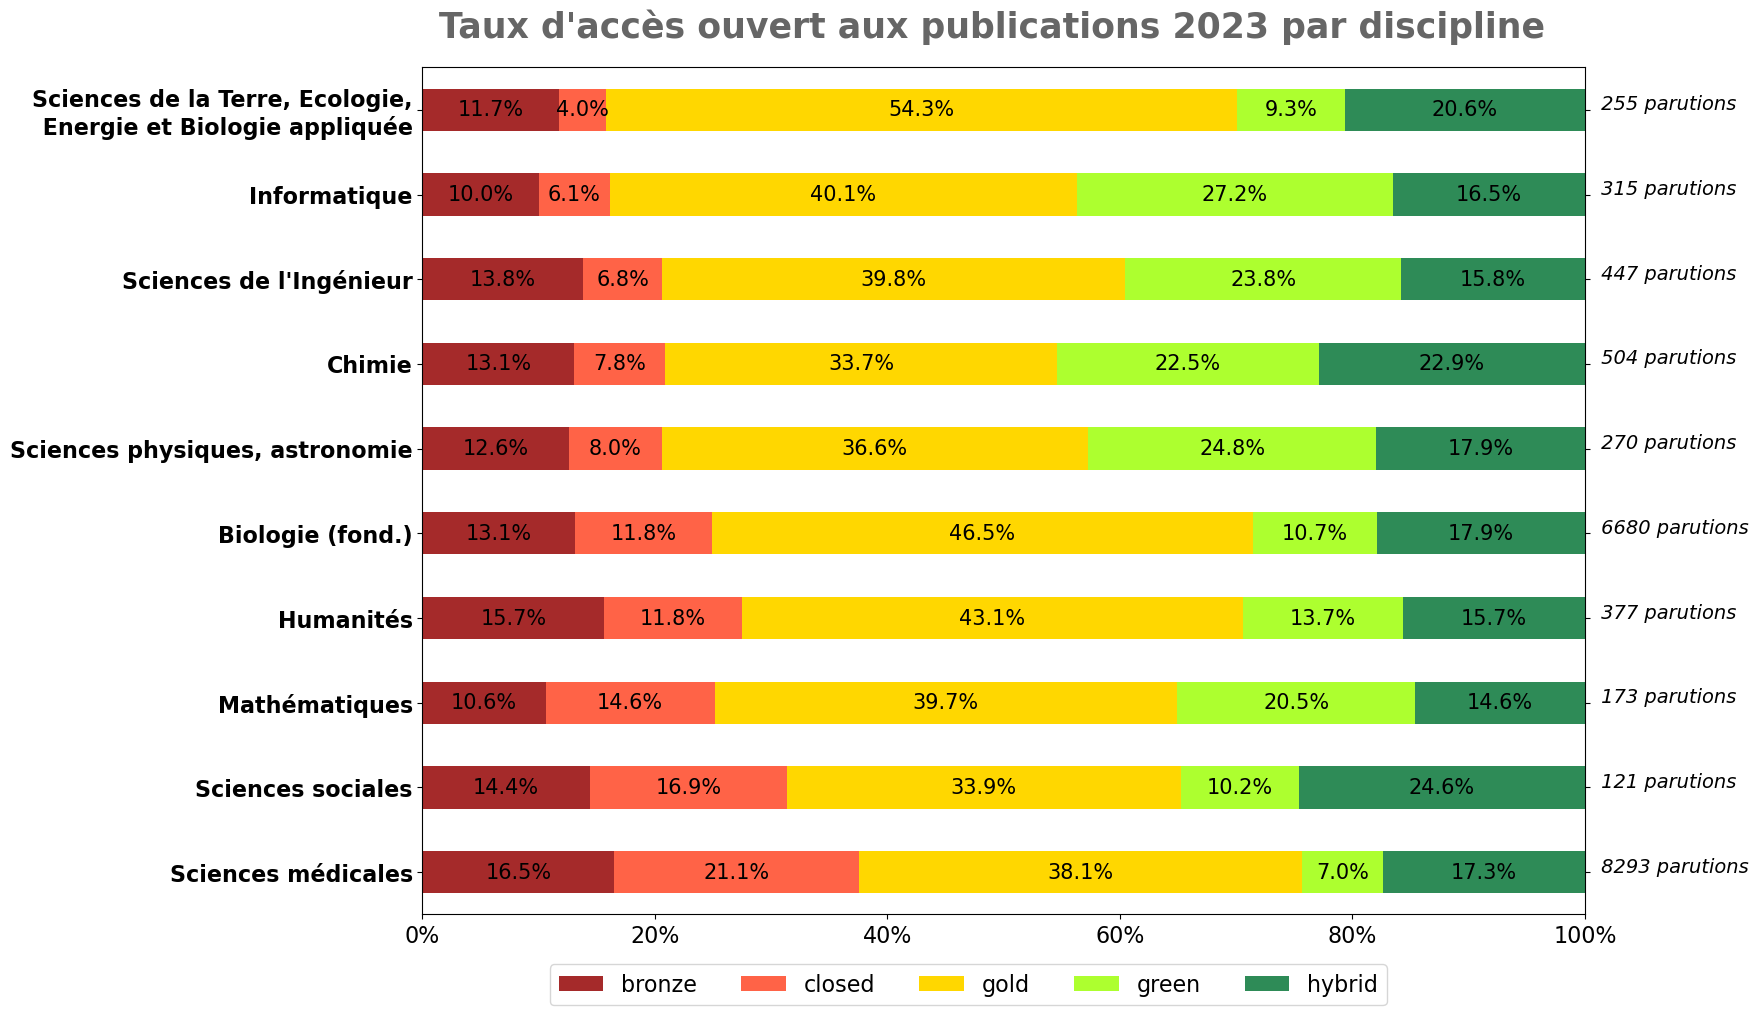

In [17]:
import matplotlib.ticker as mtick

ax = df_oa_discipline_global_type_perc.plot(
    kind="barh",
    stacked=True,
    figsize=(15, 11),
    color=['brown', "tomato", "gold","greenyellow",  "seagreen"],
)

ax.invert_yaxis()
ax.set_xlim(xmax=1)

# Affichage des pourcentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

labels = []
for j in df_oa_discipline_global_type_perc.columns:
    for i in df_oa_discipline_global_type_perc.index:
        label = f"{df_oa_discipline_global_type_perc.loc[i][j] * 100:.1f}%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# plt.tick_params(axis = 'both', labelsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16, fontweight = "semibold")

# Legendes axe X
# plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)

# Legendes axe Y
plt.ylabel(None, fontsize = 13)

# Enlève le cadre
ax.set_frame_on(False)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème
# temps.
plt.legend(#['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes'],
            loc='lower left',
            fontsize = 16,
            ncols=len(df_oa_discipline_global_type_perc.index),
            bbox_to_anchor=(0.1, -0.12),
),

# Nombres de parutions
labels = [item.get_text() for item in ax.get_yticklabels()]
parutions_labels = [f"\n {df_oa_discipline_global_type.loc[label ,'Total']} parutions" for label in labels]

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(
    np.arange(len(parutions_labels)),
    labels = parutions_labels,
    fontsize = 14,
    verticalalignment = 'baseline',
    fontstyle = "oblique"
)

plt.title(f"Taux d'accès ouvert aux publications {annee} par discipline", fontsize = 25, x = 0.49, y = 1.025,
          fontweight = 'bold', alpha = 0.6)

plt.show()
# #plt.savefig('Data/outputs/2020_taux_type_oa_discipline_type_20220217.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

#### En utilisant Plotly :

In [18]:
# import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px

In [19]:
colors = ["darkorange", "tomato",  "gold", "mediumseagreen", "green"]
legends = ['Bronze', 'Accès fermé', 'Gold', 'Archives ouvertes', 'Hybride']

# Le type de publication: ['bronze', 'closed', 'gold', 'green', 'hybrid']
type_publication_list = df_oa_discipline_global_type_perc.columns.values

# Le domaine de publication: ['Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée', 'Mathématiques', ...]
# On 'convertit' la string en string HTML: en remplacant les '\n' par des '<br>' et ajoutant des balises de gras 
domain_publication_list = [domain.replace('\n', '<br>') for domain in df_oa_discipline_global_type_perc.index.values]
domain_publication_list = [f"<b>{domain}</b>" for domain in domain_publication_list]

fig = go.Figure()

# On traverse la DataFrame 'verticalement' par type de publications: ['bronze', 'closed', 'gold', 'green', 'hybrid']
for i, type_publi in enumerate(type_publication_list):
    
    # En X on a la valeur en pourcentages [0.08518519, 0.09183673469387756, 0.12742980561555076 ... ]
    x_list = df_oa_discipline_global_type_perc.loc[:, type_publi].values

    # En Y  on a le domaine de publication['Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée', 'Mathématiques', ...]
    y_list = domain_publication_list

    # Infos supplémentaires: (nombre de publications pour ce type de publications, nombre total de publications pour ce domaine)
    # On utilise le même index, pour être sûr que les données sont alignés
    index = df_oa_discipline_global_type_perc.index
    custom_data  = np.stack([df_oa_discipline_global_type.loc[index, type_publi].values, df_oa_discipline_global_type.loc[index, "Total"].values], axis = -1)
    
    fig.add_trace(go.Bar(
        x = x_list,
        y = y_list,
        orientation = 'h',
        marker = dict(
            color = colors[i],
        ),
        
        # La légende
        name = legends[i], # ['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes']

        # Infos supplémentaires: (nombre de publications pour ce type de publications, nombre total de publications pour ce domaine)
        customdata = custom_data,
        
        # L'affichage des infos supplémentaires au survol de la barre
        hovertemplate = '<b>%{y}</b>: %{customdata[1]} publications<br>' + f'<b>{legends[i]}</b>' + ': %{customdata[0]} publications (%{x})<extra></extra>',
        hoverlabel = dict(bgcolor ='#FFF'), # couleur de fond de la bulle

        # L'annotation du pourcentage sur la barre
        text = x_list,
        texttemplate= '%{text:.1%}',
        textposition= 'inside',
    
    ))

fig.update_layout(
    barmode='stack',
    template = "plotly_white",
    height = 450,
    # X-axis
    xaxis=dict(
        title_text = None,
        fixedrange = True,
        ticks = "outside",
        minor_ticks="outside",
        minor = dict(nticks=2), # Graduations tous les 10%
        tickformat = '.0%',
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    # Y-axis
    yaxis=dict(
        title_text= None,
        fixedrange = True,
        ticks = "outside",
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    # Legend
    showlegend= True,
    legend_title = None,
    legend = dict(
        orientation="h",
        traceorder = 'normal',
        yanchor = "middle",
        y= 1.10,
        xanchor= "center",
        x= 0.375,
        borderwidth=1
    ),
    # Margins
    margin=dict(t=0, b=0),
)

fig.show()

##### Export vers une iframe :

On exporte le graphique généré par Plotly vers un fichier hmtl, qui peut ensuite être facilement intégré dans une page web via une iframe.

In [84]:
plotly_output_filename = f'./Data/outputs/{annee + 2}_proportion_oa_par_discipline_plotly.html'

# Export Plotly figure to hmtl file
fig.write_html(
    plotly_output_filename, 
    include_plotlyjs='cdn',
)

print(f'> Fichier généré: {plotly_output_filename}')

> Fichier généré: ./Data/outputs/2024_proportion_oa_par_discipline_plotly.html


## Sankey Diagram des publications

In [1]:
import plotly.graph_objects as go
# import plotly.express as px

# For color conversions
from matplotlib import colors as plt_colors

On exclut les publications avec un type 'other'. Ce qui est similaire à ce que le ministère fait au moment de générer ses visualisations.

In [9]:
df_year['genre'].value_counts(dropna=False)

genre
journal-article    16992
book-chapter         178
preprint             142
proceedings           91
other                 30
book                   2
Name: count, dtype: int64

In [11]:
print('initial shape :\n' , df_year.shape)
df_year = df_year.loc[df_year.loc[:, 'genre'] != 'other']
df_year.shape

initial shape :
 (17405, 46)


(17405, 46)

In [12]:
num_closed = df_year[df_year['is_oa'] == False].shape[0]
num_green = df_year[df_year['unpaywall_oa_status'] == 'green'].shape[0]
num_gold = df_year[df_year['unpaywall_oa_status'] == 'gold'].shape[0]
num_hybrid = df_year[df_year['unpaywall_oa_status'] == 'hybrid'].shape[0]
num_bronze = df_year[df_year['unpaywall_oa_status'] == 'bronze'].shape[0]
num_publisher = df_year[df_year['oa_host_type'].isin(['publisher', 'publisher-repository'])].shape[0]
num_publications = df_year['unpaywall_oa_status'].value_counts().sum()
# num_oa = df_year[df_year['is_oa'] == True]['is_oa'].sum()
num_oa = num_bronze + num_gold + num_hybrid + num_green

In [16]:
labels = [
    'Ensemble des publications',
    'Accès fermé',
    'Accès ouvert',
    'Archive ouverte uniquement',
    'Editeur & Archive ouverte',
    'Gold',
    'Hybride',
    'Bronze',
]
colors = [
    'cornflowerblue',
    'tomato',
    'mediumseagreen',
    '#4CAF50',
    'darkorange',
    'gold',
    '#E6AB19',
    '#CD7F32',
]
sources = [0, 0, 2, 2, 4, 4, 4]
targets = [1, 2, 3, 4, 5, 6, 7]
values = [
    num_publications,
    num_closed,
    num_oa,
    num_green,
    num_publisher,
    num_gold,
    num_hybrid,
    num_bronze,
]


# As percentage of the number of publications in this 'branch'
# percentages = [f"{(values[t]/values[s]):.2%}" for s, t in zip(sources, targets)]

# As percentage of the total number of publications
percentages = [f'{(values[t]/num_publications):.2%}' for t in targets]

# Add transparency to the list of colors, to display links with partial opacity
transparency = 0.5
colors_transparency = [
    f'rgba({rgba_color[0] * 255:.0f}, {rgba_color[1] * 255:.0f}, {rgba_color[2] * 255:.0f}, {rgba_color[3]})'
    for color in colors
    if (rgba_color := plt_colors.to_rgba(color, transparency))
]

fig = go.Figure(
    data=[
        go.Sankey(
            valuesuffix=' publications',
            # valueformat = "d",
            
            # Nodes
            node=dict(
                label=[f'<b>{label}</b>' for label in labels],
                color=colors,
                line=dict(color='black', width=0.0),
                align='left',
                hovertemplate='%{label}:',
                # hoverlabel = dict(bgcolor = "#FFFFFF"), # white background
            ),
            
            # Links
            link=dict(
                arrowlen=15,
                source=sources,
                target=targets,
                value=values[1:],
                customdata=percentages,
                label=labels[1:],
                color=colors_transparency[1:],
                hovercolor=colors[1:],
                hovertemplate='%{label}<br />%{value}<extra>%{customdata}</extra>',
                hoverlabel=dict(bgcolor='#444'),
            ),
        )
    ]
)  # fmt: skip

# Title
fig.update_layout(
    # title_text=f"<b>Proportion des publications {annee} en accès ouvert</b><br><sup>(mesuré en décembre {annee+1})</sup>",
    font_size=12,
    title_x=0.5,
    # title_y=0.85,
    # height=375,
    margin=dict(t=0, b=0),
)

# Display
fig.show()

#### Export vers une iframe :
On exporte le graphique généré par Plotly vers un fichier hmtl, qui peut ensuite être facilement intégré dans une page web via une iframe.

In [ ]:
plotly_output_filename = f'./Data/outputs/iframes/{annee + 2}_flow_chart_plotly.html'

# Export Plotly figure to hmtl file
fig.write_html(
    plotly_output_filename,
    include_plotlyjs='cdn',
)

print(f'> Fichier généré: {plotly_output_filename}')